## Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

$$f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)$$

Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [45]:
#Задаёт нужныую матрицу A
import numpy as np
def get_matrix_for_find_polynom(x):
    n = len(x)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = x[i] ** j
    return A

In [46]:
print(get_matrix_for_find_polynom([1, 15]))

[[  1.   1.]
 [  1.  15.]]


In [47]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

def get_need_value(x):
    return np.array([f(x_i) for x_i in x])

def get_values_function(g, x):
    return np.array([g(x_i) for x_i in x])

In [56]:
#f([1, 2, 3]) - not running
f(np.array([1, 2, 3]))

array([ 3.25221687,  2.31503384,  1.87783842])

In [48]:
print(get_need_value([1, 15]))

[ 3.25221687  0.63522142]


In [49]:
from scipy import linalg
def find_polynom(g, x):
    A = get_matrix_for_find_polynom(x)
    y = get_values_function(g, x)
    w = linalg.solve(A, y)
    return w

In [50]:
def calculate_polynom_on_points(w, x):
    return [sum([w[j] * x_i ** j for j in range(len(w))]) for x_i in x]

In [51]:
print(find_polynom(f, [1, 15]))
print(calculate_polynom_on_points(find_polynom(f, [1, 15]), [1, 15]))

[ 3.43914511 -0.18692825]
[3.2522168652714187, 0.63522141957866562]


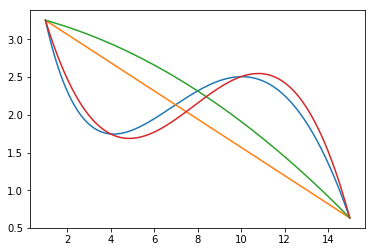

In [52]:
from matplotlib import pyplot as plt
x = np.arange(1, 15.1, 0.1)
y_f = f(x)
w_1 = find_polynom(f, [1, 15])
w_2 = find_polynom(f, [1, 8, 15])
w_3 = find_polynom(f, [1, 4, 10, 15])
y_1 = calculate_polynom_on_points(w_1, x)
y_2 = calculate_polynom_on_points(w_2, x)
y_3 = calculate_polynom_on_points(w_3, x)
plt.plot(x, y_f)
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)
plt.show()

Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

In [53]:
answer = [round(x, 2) for x in find_polynom(f, [1, 4, 10, 15])]
print("answer: ", answer)

answer:  [4.3600000000000003, -1.3, 0.19, -0.01]


In [54]:
answer_file = open("submission2.txt", 'w')
answer_file.write(" ".join(str(x) for x in answer))
answer_file.close()
!cat submission2.txt

4.36 -1.3 0.19 -0.01